In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
candidates = pd.read_csv('/content/drive/MyDrive/2024-1 KUBIG 분류예측/Results/최종_MCLP_후보지선정_30개_buffer200m.csv')

In [5]:
candidates.head()

,번호,사업장명,x,y,geometry
0,7,지에스25S강남역3호점,202462.604763,443960.186303,POINT (958334.8732534819 1944391.7342264191)
1,30,(주)코리아세븐 논현행운점,203559.445660,446001.758937,POINT (959442.0842902691 1946426.6792737076)
2,182,킹콩전자담배 선릉역점,204325.143969,444689.095230,POINT (960200.5232122428 1945110.489132843)
3,220,쿠커피(Coup Coffee 강남점),204669.543367,443873.621189,POINT (960540.4663956714 1944293.5204131103)
4,248,지에스25(GS25)역삼아르누보점,203716.938086,444579.034009,POINT (959591.9793873182 1945003.6925183798)


In [6]:
shops = pd.read_csv('/content/drive/MyDrive/2024-1 KUBIG 분류예측/Data/버퍼내근린시설개수_담배소매업기준_시설13개.csv', index_col=0)

In [7]:
shops = shops[['번호', '사업장명', '인터넷시설개수', '노래방개수',
       '휴게음식점개수', '음식점개수', '유흥주점개수', '단란주점개수', '목욕장개수', '체력단련장개수', '골프장개수',
       '관광식당개수', '숙박업개수', '관광숙박업개수', '대규모점포개수']]

In [8]:
shops

,번호,사업장명,인터넷시설개수,노래방개수,휴게음식점개수,음식점개수,유흥주점개수,단란주점개수,목욕장개수,체력단련장개수,골프장개수,관광식당개수,숙박업개수,관광숙박업개수,대규모점포개수
0,1,지에스25청담영동점,0,0,20,34,0,1,1,6,0,0,0,0,0
1,2,세븐일레븐 선정릉점(셀프빨래방),0,0,10,28,0,2,0,1,0,0,0,0,0
2,3,움편주식회사,0,0,10,27,0,1,1,0,0,0,0,0,0
3,4,(주)에스피씨삼립시티델리 도곡사옥점,0,0,0,1,0,0,0,0,0,0,0,0,0
4,5,지에스 25 대치오토웨이점,0,0,6,10,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,1049,강남하드웨어,0,4,13,108,0,0,0,3,0,0,0,0,0
1047,1050,늘봄식품,0,0,3,38,0,3,0,1,0,0,0,0,0
1048,1051,삼성식품,0,0,9,23,3,0,0,1,0,0,1,0,0
1049,1052,위드미 선릉청운점,0,0,3,12,0,1,0,0,0,0,0,0,0


In [9]:
ranking = pd.merge(candidates, shops, how='left', on=['번호','사업장명'])

In [10]:
ranking.columns

Index(['번호', '사업장명', 'x', 'y', 'geometry', '인터넷시설개수', '노래방개수', '휴게음식점개수',
       '음식점개수', '유흥주점개수', '단란주점개수', '목욕장개수', '체력단련장개수', '골프장개수', '관광식당개수',
       '숙박업개수', '관광숙박업개수', '대규모점포개수'],
      dtype='object')

In [11]:
facilities = ['음식점', '운동', '생활', '숙박', '유흥']

col_dict = {'음식점': ['휴게음식점개수','음식점개수','관광식당개수'],
        '운동': ['체력단련장개수', '골프장개수'],
        '생활': ['대규모점포개수', '목욕장개수'],
        '숙박': ['숙박업개수', '관광숙박업개수'],
        '유흥': ['유흥주점개수', '단란주점개수', '노래방개수', '인터넷시설개수']}

weight = {'음식점': 0.167,
          '운동': 0.231,
          '생활': 0.040,
          '숙박': 0.132,
          '유흥': 0.430,}

In [12]:
for facility in facilities:
  ranking[f'{facility}'] = ranking[col_dict[f'{facility}']].sum(axis=1)

In [13]:
ranking = ranking.drop(columns = ['인터넷시설개수', '노래방개수', '휴게음식점개수',
          '음식점개수', '유흥주점개수', '단란주점개수', '목욕장개수', '체력단련장개수', '골프장개수', '관광식당개수',
          '숙박업개수', '관광숙박업개수', '대규모점포개수'])

In [14]:
ranking.head(2)

,번호,사업장명,x,y,geometry,음식점,운동,생활,숙박,유흥
0,7,지에스25S강남역3호점,202462.604763,443960.186303,POINT (958334.8732534819 1944391.7342264191),88,2,1,3,3
1,30,(주)코리아세븐 논현행운점,203559.445660,446001.758937,POINT (959442.0842902691 1946426.6792737076),77,4,1,0,6


In [15]:
ranking['입지스코어'] = weight['음식점'] * ranking['음식점'] + weight['운동'] * ranking['운동'] + weight['생활'] * ranking['생활'] + weight['숙박'] * ranking['숙박'] + weight['유흥'] * ranking['유흥']

In [16]:
ranking = ranking.sort_values(by='입지스코어', ascending=False)
ranking.reset_index(inplace=True, drop=True)

In [17]:
ranking.head()

,번호,사업장명,x,y,geometry,음식점,운동,생활,숙박,유흥,입지스코어
0,770,(주)코리아세븐 수서효성점,209009.864082,442872.160579,POINT (964873.7259117004 1943269.491209139),139,6,0,0,1,25.029
1,712,지에스25 대치골드점,204673.118848,444654.538398,POINT (960548.1748783935 1945074.103777554),121,4,1,1,7,24.313
2,355,지에스(GS)25 역삼태극점,202619.098126,443688.691713,POINT (958489.8666124546 1944119.5200312757),106,3,1,1,12,23.727
3,670,지에스25 역삼캐피탈점,203019.497880,444130.331839,POINT (958892.4437695948 1944558.8632337216),84,8,0,3,11,21.002
4,681,GS25 역삼본점,203362.056529,444460.672759,POINT (959236.6138056713 1944887.2578252677),71,2,0,10,16,20.519


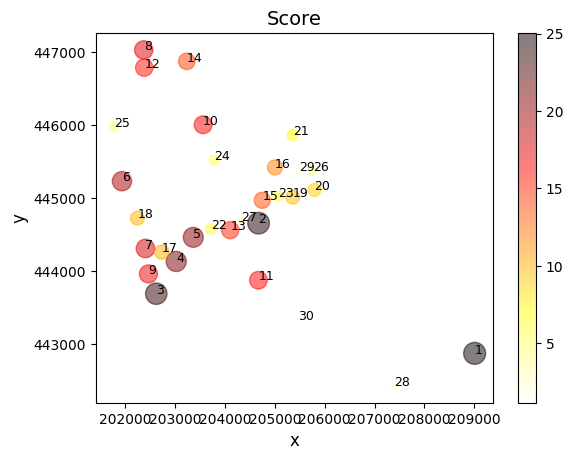

In [18]:
plt.scatter(ranking.x, # x
            ranking.y, # y
            alpha=0.5,
            s=10*ranking['입지스코어'], # marker size
            c=ranking['입지스코어'], # marker color
            cmap='hot_r')
plt.title('Score', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

for i in range(0, 30):
    plt.annotate(i+1, (ranking.loc[i, 'x'], ranking.loc[i, 'y']), fontsize=9)

plt.colorbar()
plt.show()

In [19]:
ranking.head(30)

,번호,사업장명,x,y,geometry,음식점,운동,생활,숙박,유흥,입지스코어
0,770,(주)코리아세븐 수서효성점,209009.864082,442872.160579,POINT (964873.7259117004 1943269.491209139),139,6,0,0,1,25.029
1,712,지에스25 대치골드점,204673.118848,444654.538398,POINT (960548.1748783935 1945074.103777554),121,4,1,1,7,24.313
2,355,지에스(GS)25 역삼태극점,202619.098126,443688.691713,POINT (958489.8666124546 1944119.5200312757),106,3,1,1,12,23.727
3,670,지에스25 역삼캐피탈점,203019.497880,444130.331839,POINT (958892.4437695948 1944558.8632337216),84,8,0,3,11,21.002
4,681,GS25 역삼본점,203362.056529,444460.672759,POINT (959236.6138056713 1944887.2578252677),71,2,0,10,16,20.519
5,373,이마트24 R강남대로점,201930.835054,445229.332205,POINT (957810.0363415417 1945663.1873036688),92,2,0,0,8,19.266
6,640,지에스25강남시티힐점,202402.336814,444308.396874,POINT (958276.472969656 1944740.124294483),95,1,0,0,4,17.816
7,626,GS25 압구정역점,202367.672417,447026.660213,POINT (958256.218127658 1947457.4816873495),86,6,0,0,4,17.468
8,7,지에스25S강남역3호점,202462.604763,443960.186303,POINT (958334.8732534819 1944391.7342264191),88,2,1,3,3,16.884
9,30,(주)코리아세븐 논현행운점,203559.445660,446001.758937,POINT (959442.0842902691 1946426.6792737076),77,4,1,0,6,16.403
